### 1️⃣ Load & Explore the Dataset
We load the healthcare dataset and display basic information about it to understand its structure and characteristics.

In [1]:
# Step 1: Load & Explore the Dataset
import pandas as pd

# Load dataset
file_path = "healthcare_dataset.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Display basic dataset info
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(1

In [2]:
# Display first few rows
print("\nFirst 5 Rows of Dataset:")
print(df.head())


First 5 Rows of Dataset:
                  Name  Age  Gender Blood Type Medical Condition  \
0      Tiffany Ramirez   81  Female         O-          Diabetes   
1          Ruben Burns   35    Male         O+            Asthma   
2            Chad Byrd   61    Male         B-           Obesity   
3    Antonio Frederick   49    Male         B-            Asthma   
4  Mrs. Brandy Flowers   51    Male         O-         Arthritis   

  Date of Admission          Doctor                   Hospital  \
0        2022-11-17  Patrick Parker           Wallace-Hamilton   
1        2023-06-01   Diane Jackson  Burke, Griffin and Cooper   
2        2019-01-09      Paul Baker                 Walton LLC   
3        2020-05-02  Brian Chandler                 Garcia Ltd   
4        2021-07-09  Dustin Griffin    Jones, Brown and Murray   

  Insurance Provider  Billing Amount  Room Number Admission Type  \
0           Medicare    37490.983364          146       Elective   
1   UnitedHealthcare    47304.06

### 2️⃣ Check for Missing Values
We check for missing values in the dataset, which is crucial for ensuring the completeness of the data before further analysis or model training.

In [3]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())


Missing Values in Each Column:
Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


### 3️⃣ Check for Duplicate Rows
We check for any duplicate rows in the dataset that could affect the analysis or modeling process by skewing results.

In [4]:
# Check for duplicate rows
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


### 4️⃣ Separate Numerical and Categorical Features
We separate the numerical and categorical features in the dataset to prepare them for appropriate preprocessing steps.

In [5]:
# Separate numerical and categorical features
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

print("\nNumerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['Age', 'Billing Amount', 'Room Number']
Categorical Features: ['Name', 'Gender', 'Blood Type', 'Medical Condition', 'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider', 'Admission Type', 'Discharge Date', 'Medication', 'Test Results']


### 5️⃣ Check Class Distribution of Target Variable
We check the class distribution of the target variable, "Medical Condition," to understand the balance of the classes before applying machine learning models.

In [6]:
# Check class distribution of target variable (assuming 'Medical Condition' is the target)
if "Medical Condition" in df.columns:
    print("\nClass Distribution of Medical Condition:")
    print(df["Medical Condition"].value_counts(normalize=True) * 100)


Class Distribution of Medical Condition:
Medical Condition
Asthma          17.08
Cancer          17.03
Hypertension    16.88
Arthritis       16.50
Obesity         16.28
Diabetes        16.23
Name: proportion, dtype: float64


### 6️⃣ Step 2: Data Preprocessing & Cleaning
We perform the necessary preprocessing and cleaning steps, including removing irrelevant columns, handling missing values, encoding categorical variables, and normalizing numerical features.

In [7]:
# Step 2: Data Preprocessing & Cleaning
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load dataset
file_path = "healthcare_dataset.csv"  # Update if needed
df = pd.read_csv(file_path)

### 6️⃣.1 Remove Personal & Irrelevant Information
We drop columns that are not relevant for analysis, such as personal identifiers and information that doesn’t contribute to the predictive task.

In [8]:
### 1. Remove Personal & Irrelevant Information
columns_to_drop = ["Name", "Doctor", "Hospital", "Insurance Provider", "Room Number"]
df_cleaned = df.drop(columns=columns_to_drop, errors="ignore")  # Ignore error if column not found

### 6️⃣.2 Handle Missing Values
We fill missing values in the numerical features with the median and in categorical features with a placeholder value ("Unknown") to ensure data completeness.

In [9]:
### 2. Handle Missing Values (If Any)
df_cleaned.fillna(df_cleaned.median(numeric_only=True), inplace=True)  # Fill numerical NaNs with median
df_cleaned.fillna("Unknown", inplace=True)  # Fill categorical NaNs with 'Unknown'

### 6️⃣.3 Convert Dates to Meaningful Features
We convert date-related columns into meaningful features, such as the hospital stay duration (in days), which can be useful for modeling.

In [10]:
### 3. Convert Dates to Meaningful Features
df_cleaned["Date of Admission"] = pd.to_datetime(df_cleaned["Date of Admission"], errors="coerce")
df_cleaned["Discharge Date"] = pd.to_datetime(df_cleaned["Discharge Date"], errors="coerce")

In [11]:
# Create a new feature: Hospital Stay Duration (in days)
df_cleaned["Hospital Stay (Days)"] = (df_cleaned["Discharge Date"] - df_cleaned["Date of Admission"]).dt.days

In [12]:
# Drop original date columns after extracting information
df_cleaned.drop(columns=["Date of Admission", "Discharge Date"], inplace=True)

### 6️⃣.4 Encode Categorical Variables
We encode categorical variables using binary encoding, one-hot encoding, and label encoding to make them suitable for machine learning models.

In [13]:
### 4. Encode Categorical Variables
# Binary Encoding for Gender
df_cleaned["Gender"] = df_cleaned["Gender"].map({"Male": 0, "Female": 1})

In [14]:
# One-Hot Encoding for categorical variables
df_encoded = pd.get_dummies(df_cleaned, columns=["Blood Type", "Admission Type", "Medication", "Test Results"], drop_first=True)

In [15]:
# Label Encoding for the target variable (Medical Condition)
if "Medical Condition" in df_encoded.columns:
    label_encoder = LabelEncoder()
    df_encoded["Medical Condition"] = label_encoder.fit_transform(df_encoded["Medical Condition"])

### 6️⃣.5 Normalize Numerical Features
We normalize numerical features, ensuring they are on a similar scale, which improves the performance of many machine learning algorithms.

In [16]:
### 5. Normalize Numerical Features
scaler = StandardScaler()
numeric_features = ["Age", "Billing Amount", "Hospital Stay (Days)"]
df_encoded[numeric_features] = scaler.fit_transform(df_encoded[numeric_features])

### 6️⃣.6 Final Check
We display the cleaned and processed dataset and verify that all missing values have been handled appropriately.

In [17]:
### 6. Final Check
print("Final Processed Data Sample:")
print(df_encoded.head())

print("\nMissing Values After Processing:")
print(df_encoded.isnull().sum())

Final Processed Data Sample:
        Age  Gender  Medical Condition  Billing Amount  Hospital Stay (Days)  \
0  1.508465       1                  3        0.851249             -0.181360   
1 -0.839912       0                  1        1.548866             -0.181360   
2  0.487431       0                  5        0.807452              1.676598   
3 -0.125189       0                  1       -0.157358             -1.690950   
4 -0.023086       0                  0       -0.528235              0.979864   

   Blood Type_A-  Blood Type_AB+  Blood Type_AB-  Blood Type_B+  \
0          False           False           False          False   
1          False           False           False          False   
2          False           False           False          False   
3          False           False           False          False   
4          False           False           False          False   

   Blood Type_B-  Blood Type_O+  Blood Type_O-  Admission Type_Emergency  \
0          

In [18]:
# Step 3: Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load preprocessed dataset
file_path = "healthcare_dataset.csv"  # Update if needed
df = pd.read_csv(file_path)

In [19]:
# Remove personal data and process the dataset (Repeat preprocessing steps)
columns_to_drop = ["Name", "Doctor", "Hospital", "Insurance Provider", "Room Number"]
df_cleaned = df.drop(columns=columns_to_drop, errors="ignore")

df_cleaned["Date of Admission"] = pd.to_datetime(df_cleaned["Date of Admission"], errors="coerce")
df_cleaned["Discharge Date"] = pd.to_datetime(df_cleaned["Discharge Date"], errors="coerce")
df_cleaned["Hospital Stay (Days)"] = (df_cleaned["Discharge Date"] - df_cleaned["Date of Admission"]).dt.days
df_cleaned.drop(columns=["Date of Admission", "Discharge Date"], inplace=True)

df_cleaned["Gender"] = df_cleaned["Gender"].map({"Male": 0, "Female": 1})
df_encoded = pd.get_dummies(df_cleaned, columns=["Blood Type", "Admission Type", "Medication", "Test Results"], drop_first=True)

In [20]:
# Label Encode the target variable
if "Medical Condition" in df_encoded.columns:
    label_encoder = LabelEncoder()
    df_encoded["Medical Condition"] = label_encoder.fit_transform(df_encoded["Medical Condition"])

### 7️⃣ Step 3: Exploratory Data Analysis (EDA)
We perform an Exploratory Data Analysis (EDA) to visualize the distributions and relationships between key numerical features, and assess the target variable's distribution.

### 7️⃣.1 Visualize Distributions of Key Numerical Features
We plot the distribution of key numerical features, such as Age, Billing Amount, and Hospital Stay, to understand their spread and patterns.

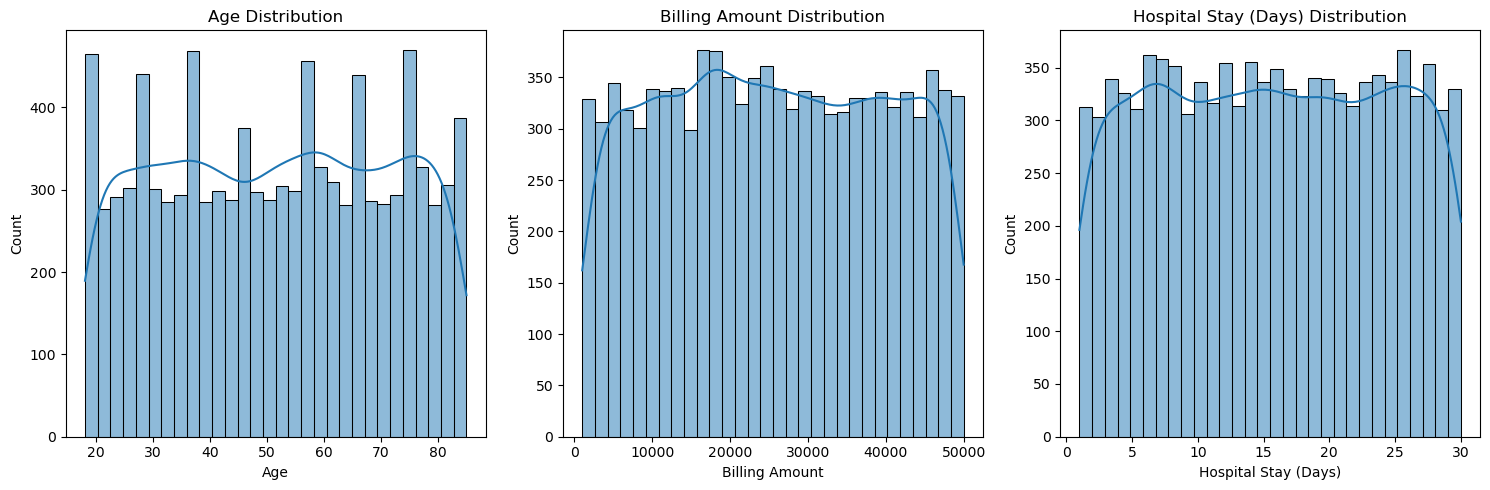

In [21]:
# Visualize distributions of key numerical features
numeric_features = ["Age", "Billing Amount", "Hospital Stay (Days)"]

plt.figure(figsize=(15, 5))
for i, feature in enumerate(numeric_features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df_encoded[feature], bins=30, kde=True)
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()

### 7️⃣.2 Correlation Heatmap
We plot a correlation heatmap to identify relationships between different features, which can inform feature selection and model interpretation.

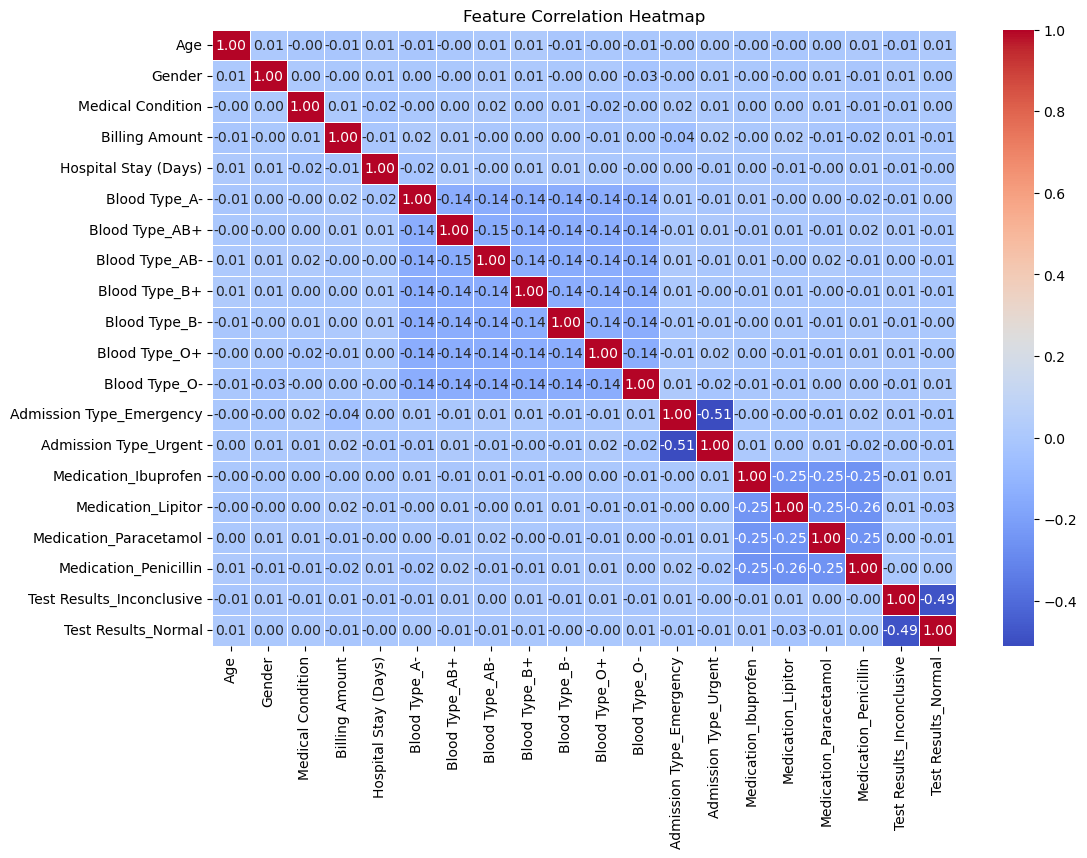

In [22]:
# Correlation heatmap (Fixed: Now works properly)
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

### 7️⃣.3 Class Distribution of Target Variable
We visualize the class distribution of the target variable, "Medical Condition," to assess whether the dataset has any class imbalances.

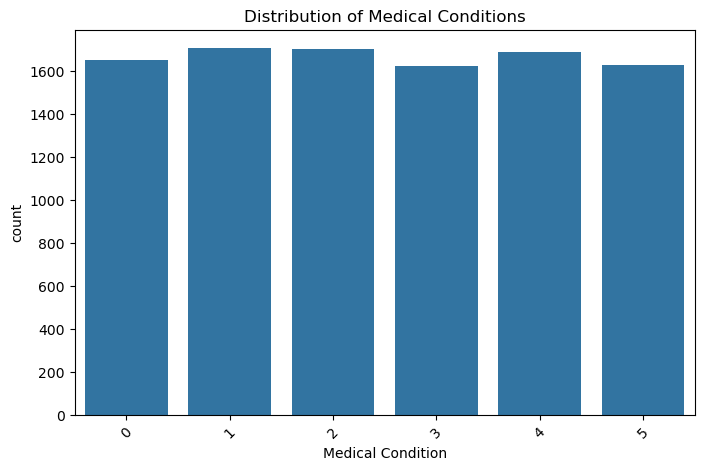

In [23]:
# Class distribution of target variable (Medical Condition)
if "Medical Condition" in df_encoded.columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=df_encoded["Medical Condition"])
    plt.xticks(rotation=45)
    plt.title("Distribution of Medical Conditions")
    plt.show()

### 8️⃣ Step 4: Handle Class Imbalance
We apply techniques like SMOTE (Synthetic Minority Over-sampling Technique) to handle class imbalances and ensure the model is trained on balanced data.

In [24]:
# Step 4: Handle Class Imbalance (if present)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split

# Load preprocessed dataset
file_path = "healthcare_dataset.csv"  # Update if needed
df = pd.read_csv(file_path)

In [25]:
# Remove personal data and process the dataset
columns_to_drop = ["Name", "Doctor", "Hospital", "Insurance Provider", "Room Number"]
df_cleaned = df.drop(columns=columns_to_drop, errors="ignore")

df_cleaned["Date of Admission"] = pd.to_datetime(df_cleaned["Date of Admission"], errors="coerce")
df_cleaned["Discharge Date"] = pd.to_datetime(df_cleaned["Discharge Date"], errors="coerce")
df_cleaned["Hospital Stay (Days)"] = (df_cleaned["Discharge Date"] - df_cleaned["Date of Admission"]).dt.days
df_cleaned.drop(columns=["Date of Admission", "Discharge Date"], inplace=True)

df_cleaned["Gender"] = df_cleaned["Gender"].map({"Male": 0, "Female": 1})
df_encoded = pd.get_dummies(df_cleaned, columns=["Blood Type", "Admission Type", "Medication", "Test Results"], drop_first=True)

In [26]:
# Label Encode the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_encoded["Medical Condition"] = label_encoder.fit_transform(df_encoded["Medical Condition"])

In [27]:
# Split dataset into features and target variable
X = df_encoded.drop(columns=["Medical Condition"])
y = df_encoded["Medical Condition"]

In [28]:
# Check class distribution before SMOTE
print("Class distribution before SMOTE:", Counter(y))

Class distribution before SMOTE: Counter({1: 1708, 2: 1703, 4: 1688, 0: 1650, 5: 1628, 3: 1623})


### 8️⃣.1 Apply SMOTE for Oversampling
We use SMOTE to oversample the minority class in the dataset, ensuring a balanced class distribution for training machine learning models.

In [29]:
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [30]:
# Check class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

Class distribution after SMOTE: Counter({3: 1708, 1: 1708, 5: 1708, 0: 1708, 4: 1708, 2: 1708})


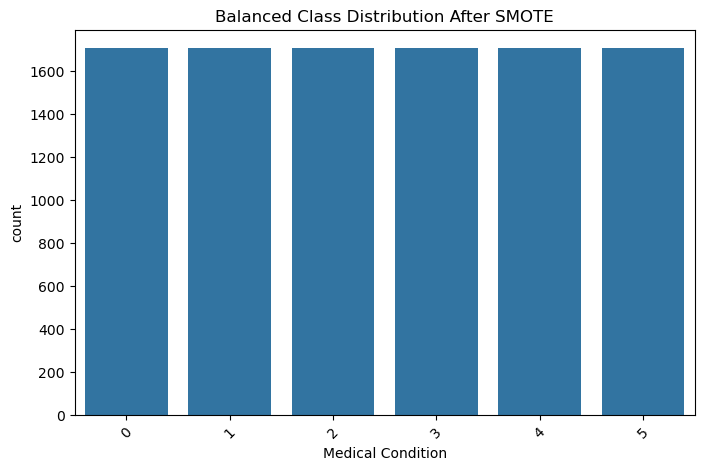

In [31]:
# Visualize the class distribution after SMOTE
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled)
plt.xticks(rotation=45)
plt.title("Balanced Class Distribution After SMOTE")
plt.show()

### 8️⃣.2 Final Train-Test Split (After SMOTE)
We perform a final train-test split on the resampled dataset to ensure that the model is trained on balanced data and evaluated properly.

In [32]:
# Final Train-Test Split (After SMOTE)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

print("Final Train Shape:", X_train.shape, "Final Test Shape:", X_test.shape)

Final Train Shape: (8198, 19) Final Test Shape: (2050, 19)


### 9️⃣ Step 5: Feature Engineering & Selection
We perform feature engineering and selection to improve model performance by choosing the most important features and reducing dimensionality.

In [33]:
# Step 5: Feature Engineering & Selection (Fixed Chi-Square Issue)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load preprocessed dataset
file_path = "healthcare_dataset.csv"  # Update if needed
df = pd.read_csv(file_path)

In [34]:
# Remove personal data and process the dataset
columns_to_drop = ["Name", "Doctor", "Hospital", "Insurance Provider", "Room Number"]
df_cleaned = df.drop(columns=columns_to_drop, errors="ignore")

df_cleaned["Date of Admission"] = pd.to_datetime(df_cleaned["Date of Admission"], errors="coerce")
df_cleaned["Discharge Date"] = pd.to_datetime(df_cleaned["Discharge Date"], errors="coerce")
df_cleaned["Hospital Stay (Days)"] = (df_cleaned["Discharge Date"] - df_cleaned["Date of Admission"]).dt.days
df_cleaned.drop(columns=["Date of Admission", "Discharge Date"], inplace=True)

df_cleaned["Gender"] = df_cleaned["Gender"].map({"Male": 0, "Female": 1})
df_encoded = pd.get_dummies(df_cleaned, columns=["Blood Type", "Admission Type", "Medication", "Test Results"], drop_first=True)

In [35]:
# Label Encode the target variable
label_encoder = LabelEncoder()
df_encoded["Medical Condition"] = label_encoder.fit_transform(df_encoded["Medical Condition"])

In [36]:
# Split dataset into features and target variable
X = df_encoded.drop(columns=["Medical Condition"])
y = df_encoded["Medical Condition"]

### 9️⃣.1 Normalize Numerical Features
We normalize the numerical features to ensure they are scaled properly, improving the training process for machine learning models.

In [37]:
# Normalize only numerical features
scaler = StandardScaler()
numeric_features = ["Age", "Billing Amount", "Hospital Stay (Days)"]
X[numeric_features] = scaler.fit_transform(X[numeric_features])

### 9️⃣.2 Feature Selection
We use SelectKBest, PCA, and other feature selection techniques to identify the most relevant features for predicting the target variable.

### 1️⃣ Chi-Square Test (For Categorical Features)
We apply the Chi-Square Test to select the most significant categorical features by evaluating their association with the target variable.

In [38]:
### Feature Selection Using Statistical Tests

# 1. Chi-Square Test (Only for categorical features)
categorical_features = [col for col in X.columns if X[col].dtype == "uint8"]  # One-hot encoded columns
if categorical_features:
    chi2_selector = SelectKBest(score_func=chi2, k=min(10, len(categorical_features)))
    X_chi2_selected = chi2_selector.fit_transform(X[categorical_features], y)
    chi2_scores = pd.Series(chi2_selector.scores_, index=categorical_features)
    chi2_top_features = chi2_scores.nlargest(10)
    print("\nTop Features Based on Chi-Square Test:\n", chi2_top_features)

### 2️⃣ ANOVA (For Numerical Features)
We apply ANOVA (Analysis of Variance) to identify the most relevant numerical features that have the highest variance and relationship with the target variable.

In [39]:
# 2. ANOVA (For numerical features)
anova_selector = SelectKBest(score_func=f_classif, k=min(10, len(numeric_features)))
X_anova_selected = anova_selector.fit_transform(X[numeric_features], y)
anova_scores = pd.Series(anova_selector.scores_, index=numeric_features)
anova_top_features = anova_scores.nlargest(10)
print("\nTop Features Based on ANOVA Test:\n", anova_top_features)


Top Features Based on ANOVA Test:
 Hospital Stay (Days)    1.043243
Billing Amount          0.924809
Age                     0.601560
dtype: float64


### 3️⃣ Mutual Information (For Both Numerical & Categorical Features)
We compute Mutual Information to assess the dependency between each feature and the target, identifying the features that provide the most information.

In [40]:
# 3. Mutual Information (For both numerical & categorical features)
mi_selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_mi_selected = mi_selector.fit_transform(X, y)
mi_scores = pd.Series(mi_selector.scores_, index=X.columns)
mi_top_features = mi_scores.nlargest(10)
print("\nTop Features Based on Mutual Information:\n", mi_top_features)


Top Features Based on Mutual Information:
 Medication_Ibuprofen         0.005975
Billing Amount               0.005794
Admission Type_Urgent        0.005682
Test Results_Inconclusive    0.005483
Blood Type_O+                0.005085
Medication_Lipitor           0.004694
Blood Type_B+                0.003176
Hospital Stay (Days)         0.002994
Medication_Penicillin        0.001880
Test Results_Normal          0.001128
dtype: float64


### 4️⃣ Combine Top Features from All Methods
We combine the top features identified from Chi-Square, ANOVA, and Mutual Information into a final set of selected features that will be used for training the model.

In [41]:
# Combine Top Features from All Methods
selected_features = set(anova_top_features.index) | set(mi_top_features.index)
if categorical_features:
    selected_features |= set(chi2_top_features.index)

print("\nFinal Selected Features:\n", selected_features)


Final Selected Features:
 {'Test Results_Normal', 'Admission Type_Urgent', 'Medication_Ibuprofen', 'Blood Type_B+', 'Billing Amount', 'Medication_Penicillin', 'Age', 'Test Results_Inconclusive', 'Hospital Stay (Days)', 'Medication_Lipitor', 'Blood Type_O+'}


### 5️⃣ Dimensionality Reduction with PCA
We apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset, transforming it into a smaller set of components that capture the most variance.

In [42]:
### Dimensionality Reduction with PCA
pca = PCA(n_components=10)  # Reduce to 10 components
X_pca = pca.fit_transform(X)

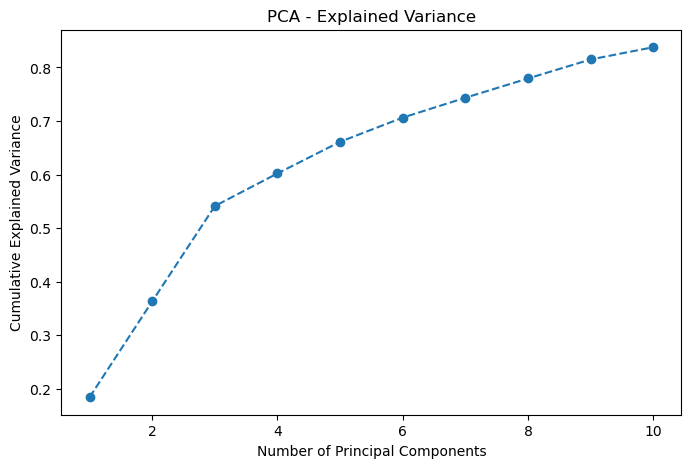

In [43]:
# Explained Variance Plot
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), np.cumsum(pca.explained_variance_ratio_), marker="o", linestyle="--")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Explained Variance")
plt.show()

In [44]:
# Final Dataset with Selected Features
X_selected = X[list(selected_features)]  # Use only best features for training

print("Final Shape of Selected Features Data:", X_selected.shape)

Final Shape of Selected Features Data: (10000, 11)


In [45]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [47]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 1.4 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 1.5 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 1.4 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Logistic Regression: Mean Accuracy = 0.1601
Decision Tree: Mean Accuracy = 0.1609
Random Forest: Mean Accuracy = 0.1645
SVM: Mean Accuracy = 0.1663
Gradient Boosting: Mean Accuracy = 0.1620


C:\Users\Shik\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:50:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Shik\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:50:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\Shik\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:50:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, Us

XGBoost: Mean Accuracy = 0.1658
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 19
[LightGBM] [Info] Start training from score -1.801810
[LightGBM] [Info] Start training from score -1.767372
[LightGBM] [Info] Start training from score -1.770120
[LightGBM] [Info] Start training from score -1.818039
[LightGBM] [Info] Start training from score -1.779337
[LightGBM] [Info] Start training from score -1.815156
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000077 seconds.
You can set `force_row_wise=t

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network: Mean Accuracy = 0.1731

Best Model: Neural Network
Test Accuracy: 0.1775

Classification Report:
               precision    recall  f1-score   support

   Arthritis       0.18      0.20      0.19       330
      Asthma       0.18      0.22      0.20       342
      Cancer       0.17      0.15      0.16       340
    Diabetes       0.18      0.17      0.18       325
Hypertension       0.17      0.17      0.17       338
     Obesity       0.18      0.15      0.16       325

    accuracy                           0.18      2000
   macro avg       0.18      0.18      0.18      2000
weighted avg       0.18      0.18      0.18      2000



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


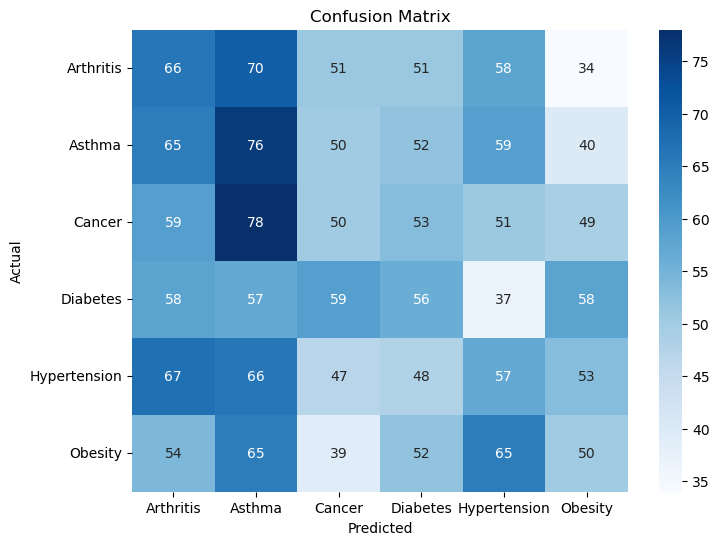

In [48]:
# Step 6: Choose & Train Classification Models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Load preprocessed dataset
file_path = "healthcare_dataset.csv"  # Update if needed
df = pd.read_csv(file_path)

# Remove personal data and process the dataset
columns_to_drop = ["Name", "Doctor", "Hospital", "Insurance Provider", "Room Number"]
df_cleaned = df.drop(columns=columns_to_drop, errors="ignore")

df_cleaned["Date of Admission"] = pd.to_datetime(df_cleaned["Date of Admission"], errors="coerce")
df_cleaned["Discharge Date"] = pd.to_datetime(df_cleaned["Discharge Date"], errors="coerce")
df_cleaned["Hospital Stay (Days)"] = (df_cleaned["Discharge Date"] - df_cleaned["Date of Admission"]).dt.days
df_cleaned.drop(columns=["Date of Admission", "Discharge Date"], inplace=True)

df_cleaned["Gender"] = df_cleaned["Gender"].map({"Male": 0, "Female": 1})
df_encoded = pd.get_dummies(df_cleaned, columns=["Blood Type", "Admission Type", "Medication", "Test Results"], drop_first=True)

# Label Encode the target variable
label_encoder = LabelEncoder()
df_encoded["Medical Condition"] = label_encoder.fit_transform(df_encoded["Medical Condition"])

# Split dataset into features and target variable
X = df_encoded.drop(columns=["Medical Condition"])
y = df_encoded["Medical Condition"]

# Normalize numerical features
scaler = StandardScaler()
numeric_features = ["Age", "Billing Amount", "Hospital Stay (Days)"]
X[numeric_features] = scaler.fit_transform(X[numeric_features])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"),
    "LightGBM": LGBMClassifier(),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=500)
}

# Train & Evaluate Models with Cross-Validation
cv_results = {}
strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=strat_kfold, scoring="accuracy")
    cv_results[name] = np.mean(scores)
    print(f"{name}: Mean Accuracy = {cv_results[name]:.4f}")

# Select the Best Model
best_model_name = max(cv_results, key=cv_results.get)
best_model = models[best_model_name]

# Train Best Model on Full Training Data
best_model.fit(X_train, y_train)

# Make Predictions
y_pred = best_model.predict(X_test)

# Evaluate Best Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"\nBest Model: {best_model_name}")
print(f"Test Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_rep)

# Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Test Accuracy: 0.1775
Weighted Precision: 0.1770
Weighted Recall: 0.1775
Weighted F1-score: 0.1766

Classification Report:
               precision    recall  f1-score   support

   Arthritis       0.18      0.20      0.19       330
      Asthma       0.18      0.22      0.20       342
      Cancer       0.17      0.15      0.16       340
    Diabetes       0.18      0.17      0.18       325
Hypertension       0.17      0.17      0.17       338
     Obesity       0.18      0.15      0.16       325

    accuracy                           0.18      2000
   macro avg       0.18      0.18      0.18      2000
weighted avg       0.18      0.18      0.18      2000



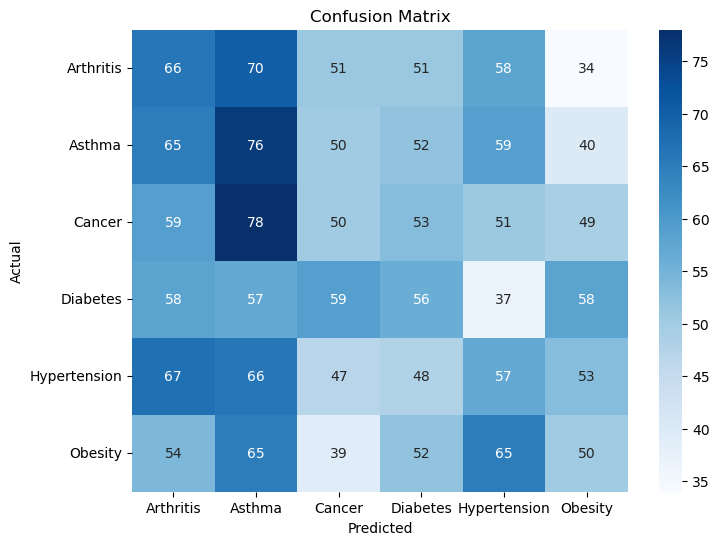

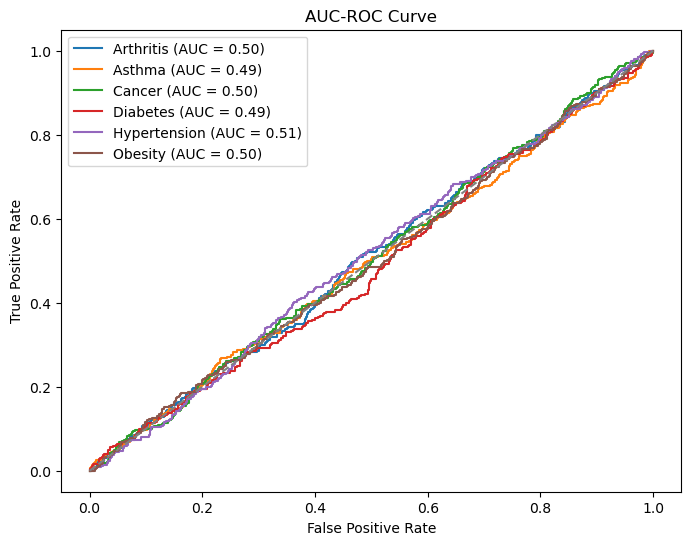

In [49]:
# Step 7: Evaluate Model Performance
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve,
    classification_report, confusion_matrix
)
from sklearn.preprocessing import label_binarize

# Get class names
class_names = label_encoder.classes_

# Predictions from the best model (Already trained in Step 6)
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test) if hasattr(best_model, "predict_proba") else None  # Some models don't support probability

# 1. Accuracy, Precision, Recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-score: {f1:.4f}")

# Print Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

# 2. Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 3. AUC-ROC Curve (Only for models that support probability predictions)
if y_pred_proba is not None:
    # Convert target variable to binary for multi-class AUC computation
    y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
    
    plt.figure(figsize=(8, 6))
    
    for i, class_name in enumerate(class_names):
        fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        auc = roc_auc_score(y_test_bin[:, i], y_pred_proba[:, i])
        plt.plot(fpr, tpr, label=f"{class_name} (AUC = {auc:.2f})")

    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC-ROC Curve")
    plt.legend()
    plt.show()

In [50]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [51]:
# Step 8: Ensure Model Interpretability using SHAP
import shap
import matplotlib.pyplot as plt

# Initialize SHAP Explainer for Tree-based Models (e.g., XGBoost, Random Forest, LightGBM)
if hasattr(best_model, "feature_importances_"):  
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test)

    # Summary Plot - Shows the impact of each feature
    shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)

    # Feature Importance Plot
    shap.summary_plot(shap_values, X_test, plot_type="bar")

# If using models without `feature_importances_`, use Kernel Explainer (slower)
else:
    explainer = shap.KernelExplainer(best_model.predict, X_test[:50])  # Using a small sample for speed
    shap_values = explainer.shap_values(X_test[:50])

    # Waterfall Plot for a single prediction explanation
    shap.initjs()
    shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0, :])

  0%|          | 0/50 [00:00<?, ?it/s]

In [52]:
# Step 9: Optimize & Fine-Tune Model for Best Accuracy
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# Define hyperparameter grids for different models

param_grid_rf = {
    "n_estimators": [100, 200],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

param_grid_xgb = {
    "n_estimators": [100, 200],
    "max_depth": [3, 6],
    "learning_rate": [0.01, 0.1]
}

param_grid_lgbm = {
    "n_estimators": [100, 200],
    "num_leaves": [20, 31],
    "learning_rate": [0.01, 0.1]
}

param_grid_mlp = {
    "hidden_layer_sizes": [(50, 50), (100,)],
    "activation": ["relu", "tanh"],
    "learning_rate_init": [0.001, 0.01]
}

# Tune each model separately
models = {
    "Random Forest": (RandomForestClassifier(), param_grid_rf),
    "XGBoost": (XGBClassifier(use_label_encoder=False, eval_metric="mlogloss"), param_grid_xgb),
    "LightGBM": (LGBMClassifier(), param_grid_lgbm),
    "Neural Network": (MLPClassifier(max_iter=500), param_grid_mlp)
}

best_models = {}

for name, (model, param_grid) in models.items():
    print(f"\nTuning Hyperparameters for {name}...")
    
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring="accuracy", n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    
    best_models[name] = grid_search.best_estimator_
    print(f"Best Parameters for {name}: {grid_search.best_params_}")
    print(f"Best Accuracy for {name}: {grid_search.best_score_:.4f}")

# Evaluate the best tuned model
final_model = best_models[max(best_models, key=lambda x: best_models[x].score(X_train, y_train))]
y_pred_final = final_model.predict(X_test)

accuracy_final = accuracy_score(y_test, y_pred_final)
print(f"\nFinal Tuned Model: {final_model.__class__.__name__}")
print(f"Final Test Accuracy: {accuracy_final:.4f}")
print("\nFinal Classification Report:\n", classification_report(y_test, y_pred_final, target_names=label_encoder.classes_))


Tuning Hyperparameters for Random Forest...
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters for Random Forest: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Accuracy for Random Forest: 0.1691

Tuning Hyperparameters for XGBoost...
Fitting 3 folds for each of 8 candidates, totalling 24 fits


C:\Users\Shik\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [17:52:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 100}
Best Accuracy for XGBoost: 0.1698

Tuning Hyperparameters for LightGBM...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000083 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 19
[LightGBM] [Info] Start training from score -1.801810
[LightGBM] [Info] Start training from score -1.767555
[LightGBM] [Info] Start training from score -1.769753
[LightGBM] [Info] Start training from score -1.818617
[LightGBM] [Info] Start training from score -1.779337
[LightGBM] [Info] Start training from score -1.814772
Best Parameters for L

In [53]:
pip install streamlit scikit-learn pandas numpy joblib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [54]:
import joblib

# Save the best model
joblib.dump(final_model, "healthcare_model.pkl")
print("Model saved successfully!")

Model saved successfully!
